In [ ]:
# 04 — Neural Networks

Build feed-forward neural networks to predict 30-day readmission.
We will use Keras (TensorFlow backend) and evaluate accuracy and ROC-AUC.


In [5]:
# Imports + Load Data

import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")



In [8]:
# === Load processed sparse arrays ===
X_train = sparse.load_npz("data/processed/X_train.npz")
X_test = sparse.load_npz("data/processed/X_test.npz")
y_train = np.load("data/processed/y_train.npy", allow_pickle=True)
y_test = np.load("data/processed/y_test.npy", allow_pickle=True)

print("Data loaded successfully!")
print("X_train shape (sparse):", X_train.shape)
print("X_test shape (sparse):", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Data loaded successfully!
X_train shape (sparse): (81412, 2470)
X_test shape (sparse): (20354, 2470)
y_train shape: (81412,)
y_test shape: (20354,)


In [9]:
# =========================
# Convert Sparse to Dense
# =========================

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

print("Conversion complete.")
print("X_train_dense shape:", X_train_dense.shape)
print("X_test_dense shape:", X_test_dense.shape)


Conversion complete.
X_train_dense shape: (81412, 2470)
X_test_dense shape: (20354, 2470)


In [10]:
# =========================
# Build & Train Neural Network
# =========================

nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=50,    # adjust if needed
    batch_size=128,
    random_state=42,
    verbose=True
)

nn.fit(X_train_dense, y_train)



Iteration 1, loss = 0.33805669
Iteration 2, loss = 0.33021130
Iteration 3, loss = 0.32577393
Iteration 4, loss = 0.32047479
Iteration 5, loss = 0.31397566
Iteration 6, loss = 0.30452372
Iteration 7, loss = 0.29361246
Iteration 8, loss = 0.28056382
Iteration 9, loss = 0.26651843
Iteration 10, loss = 0.25285121
Iteration 11, loss = 0.23858925
Iteration 12, loss = 0.22678708
Iteration 13, loss = 0.21522544
Iteration 14, loss = 0.20547278
Iteration 15, loss = 0.19633747
Iteration 16, loss = 0.18729158
Iteration 17, loss = 0.18034701
Iteration 18, loss = 0.17313793
Iteration 19, loss = 0.16657037
Iteration 20, loss = 0.15997096
Iteration 21, loss = 0.15738842
Iteration 22, loss = 0.14932360
Iteration 23, loss = 0.14642392
Iteration 24, loss = 0.14044557
Iteration 25, loss = 0.13600736
Iteration 26, loss = 0.13458114
Iteration 27, loss = 0.12850126
Iteration 28, loss = 0.12548403
Iteration 29, loss = 0.12216741
Iteration 30, loss = 0.11888950
Iteration 31, loss = 0.11805847
Iteration 32, los

C:\Users\HP\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


,"hidden_layer_sizes hidden_layer_sizes: array-like of shape(n_layers - 2,), default=(100,)The ith element represents the number of neurons in the ithhidden layer.","(64, ...)"
,"activation activation: {'identity', 'logistic', 'tanh', 'relu'}, default='relu'Activation function for the hidden layer.- 'identity', no-op activation, useful to implement linear bottleneck, returns f(x) = x- 'logistic', the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).- 'tanh', the hyperbolic tan function, returns f(x) = tanh(x).- 'relu', the rectified linear unit function, returns f(x) = max(0, x)",'relu'
,"solver solver: {'lbfgs', 'sgd', 'adam'}, default='adam'The solver for weight optimization.- 'lbfgs' is an optimizer in the family of quasi-Newton methods.- 'sgd' refers to stochastic gradient descent.- 'adam' refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy BaFor a comparison between Adam optimizer and SGD, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_training_curves.py`.Note: The default solver 'adam' works pretty well on relativelylarge datasets (with thousands of training samples or more) in terms ofboth training time and validation score.For small datasets, however, 'lbfgs' can converge faster and performbetter.",'adam'
,"alpha alpha: float, default=0.0001Strength of the L2 regularization term. The L2 regularization termis divided by the sample size when added to the loss.For an example usage and visualization of varying regularization, see:ref:`sphx_glr_auto_examples_neural_networks_plot_mlp_alpha.py`.",0.0001
,"batch_size batch_size: int, default='auto'Size of minibatches for stochastic optimizers.If the solver is 'lbfgs', the classifier will not use minibatch.When set to ""auto"", `batch_size=min(200, n_samples)`.",128
,"learning_rate learning_rate: {'constant', 'invscaling', 'adaptive'}, default='constant'Learning rate schedule for weight updates.- 'constant' is a constant learning rate given by 'learning_rate_init'.- 'invscaling' gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. effective_learning_rate = learning_rate_init / pow(t, power_t)- 'adaptive' keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.Only used when ``solver='sgd'``.",'constant'
,"learning_rate_init learning_rate_init: float, default=0.001The initial learning rate used. It controls the step-sizein updating the weights. Only used when solver='sgd' or 'adam'.",0.001
,"power_t power_t: float, default=0.5The exponent for inverse scaling learning rate.It is used in updating effective learning rate when the learning_rateis set to 'invscaling'. Only used when solver='sgd'.",0.5
,"max_iter max_iter: int, default=200Maximum number of iterations. The solver iterates until convergence(determined by 'tol') or this number of iterations. For stochasticsolvers ('sgd', 'adam'), note that this determines the number of epochs(how many times each data point will be used), not the number ofgradient steps.",50
,"shuffle shuffle: bool, default=TrueWhether to shuffle samples in each iteration. Only used whensolver='sgd' or 'adam'.",True
,"random_state random_state: int, RandomState instance, default=NoneDetermines random number generation for weights and biasinitialization, train-test split if early stopping is used, and batchsampling when solver='sgd' or 'adam'.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42


In [11]:
# =========================
# Evaluate Neural Network
# =========================

pred_nn = nn.predict(X_test_dense)
prob_nn = nn.predict_proba(X_test_dense)[:,1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Neural Network Results (MLPClassifier):")
print("Accuracy:", accuracy_score(y_test, pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, prob_nn))
print(classification_report(y_test, pred_nn))


Neural Network Results (MLPClassifier):
Accuracy: 0.8186105925125282
ROC-AUC: 0.5618497542509899
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     18083
           1       0.17      0.16      0.17      2271

    accuracy                           0.82     20354
   macro avg       0.53      0.53      0.53     20354
weighted avg       0.81      0.82      0.82     20354



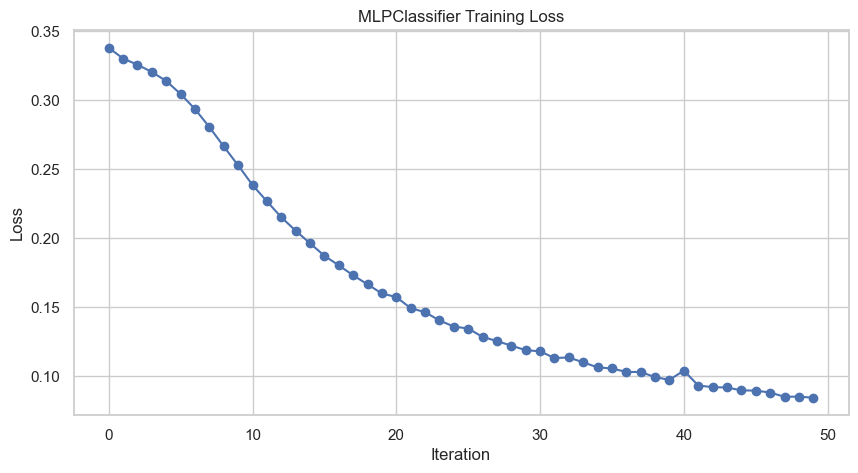

In [12]:
# =========================
# Plot Training Loss
# =========================

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(nn.loss_curve_, marker='o', linestyle='-')
plt.title("MLPClassifier Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

